In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train.astype('float32') / 255.0, x_test.astype('float32') / 255.0
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

# Define the CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Dropout(0.2),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Dropout(0.2),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dropout(0.2),
    Dense(1024, activation='relu'),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


Epoch 1/50
782/782 [==============================] - 12s 12ms/step - loss: 1.6950 - accuracy: 0.3699 - val_loss: 1.4175 - val_accuracy: 0.4954
Epoch 2/50
782/782 [==============================] - 9s 11ms/step - loss: 1.2212 - accuracy: 0.5625 - val_loss: 1.0608 - val_accuracy: 0.6195
Epoch 3/50
782/782 [==============================] - 9s 12ms/step - loss: 1.0060 - accuracy: 0.6452 - val_loss: 0.9562 - val_accuracy: 0.6560
Epoch 4/50
782/782 [==============================] - 9s 11ms/step - loss: 0.8800 - accuracy: 0.6911 - val_loss: 0.8148 - val_accuracy: 0.7190
Epoch 5/50
782/782 [==============================] - 9s 11ms/step - loss: 0.7963 - accuracy: 0.7203 - val_loss: 0.7668 - val_accuracy: 0.7371
Epoch 6/50
782/782 [==============================] - 9s 11ms/step - loss: 0.7252 - accuracy: 0.7462 - val_loss: 0.7469 - val_accuracy: 0.7385
Epoch 7/50
782/782 [==============================] - 9s 11ms/step - loss: 0.6754 - accuracy: 0.7619 - val_loss: 0.7194 - val_accuracy: 0.752

In [ ]:
import numpy as np

# Predict the first 4 images of the test data
predictions = model.predict(x_test[:4])
predicted_classes = np.argmax(predictions, axis=1)

# Get the actual labels for the first 4 images
actual_classes = np.argmax(y_test[:4], axis=1)

# Compare the predicted classes with the actual classes
for i in range(4):
    print(f"Image {i+1}:")
    print(f"Predicted: {predicted_classes[i]}, Actual: {actual_classes[i]}")
    print(f"Correct: {predicted_classes[i] == actual_classes[i]}")


1/1 [==============================] - 0s 434ms/step
Image 1:
Predicted: 3, Actual: 3
Correct: True
Image 2:
Predicted: 8, Actual: 8
Correct: True
Image 3:
Predicted: 8, Actual: 8
Correct: True
Image 4:
Predicted: 0, Actual: 0
Correct: True


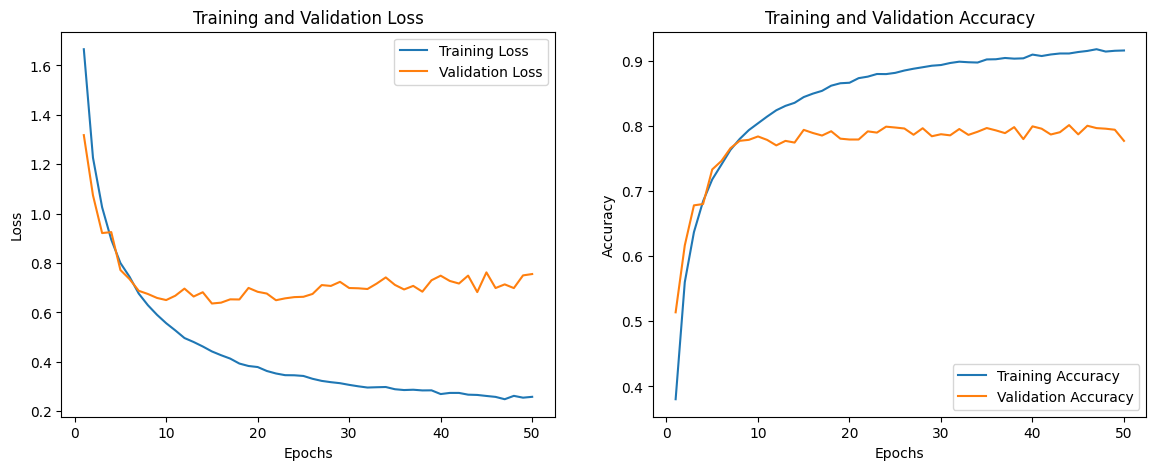

In [ ]:
import matplotlib.pyplot as plt

# Extract the loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Define the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Display the plots
plt.show()
